In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
error_value = "9999.9"

In [4]:
f = open("MonthElb_012010_004028900.csv")
file = f.readlines()

In [5]:
dizionario = {"DATA":[], "TERMA":[]}
dizionario

{'DATA': [], 'TERMA': []}

In [6]:
dizionario = {"DATA":[], "ORA":[], "TERMA":[]}
header = ["DATA", "ORA", "TERMA"]     #dizionario.keys()
posizione_campi = [0, 1, 9]
for riga in file:
    r = riga.split(",")
    r[-1] = r[-1].strip()
    #prendo solo campi utili a me
    campi_utili = [r[i] for i in posizione_campi]
    
    if error_value not in campi_utili:
        for chiave, valore in zip(header, campi_utili):
            if chiave == "TERMA":
                dizionario[chiave].append(float(valore))
            else:
                dizionario[chiave].append(valore)


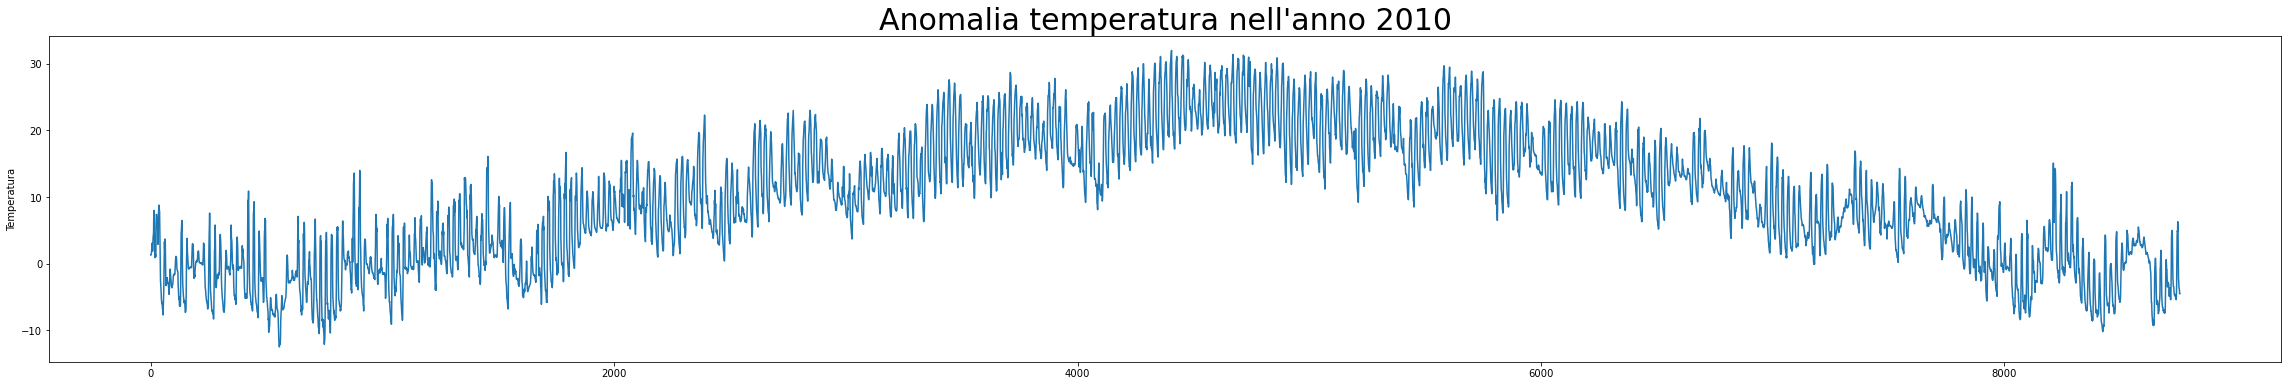

In [7]:
fig, ax = plt.subplots(figsize = (40,6))
ax.plot(dizionario["TERMA"])
ax.set_title("Anomalia temperatura nell'anno 2010", fontsize = 30)
ax.set_ylabel("Temperatura")
plt.show()

In [8]:
#dizionario_giorni = {"GIORNO":[], "MESE":[], "ANNO":[]}
dizionario["GIORNO"] = []
dizionario["MESE"] = [] 
dizionario["ANNO"] = []
dati = dizionario['DATA']
for data in dati:
    data = data.split('-')
    dizionario["GIORNO"].append(data[0])
    dizionario["MESE"].append(data[1])
    dizionario["ANNO"].append(data[2])
    
#dizionario_giorni = np.array(dizionario_giorni)


In [9]:
for chiave in dizionario:
    dizionario[chiave] = np.array(dizionario[chiave])
dizionario

{'DATA': array(['01-01-2010', '01-01-2010', '01-01-2010', ..., '31-12-2010',
        '31-12-2010', '31-12-2010'], dtype='<U10'),
 'ORA': array(['00:00', '01:00', '02:00', ..., '21:00', '22:00', '23:00'],
       dtype='<U5'),
 'TERMA': array([ 1.3,  1.3,  1.4, ..., -3.9, -4.5, -4.5]),
 'GIORNO': array(['01', '01', '01', ..., '31', '31', '31'], dtype='<U2'),
 'MESE': array(['01', '01', '01', ..., '12', '12', '12'], dtype='<U2'),
 'ANNO': array(['2010', '2010', '2010', ..., '2010', '2010', '2010'], dtype='<U4')}

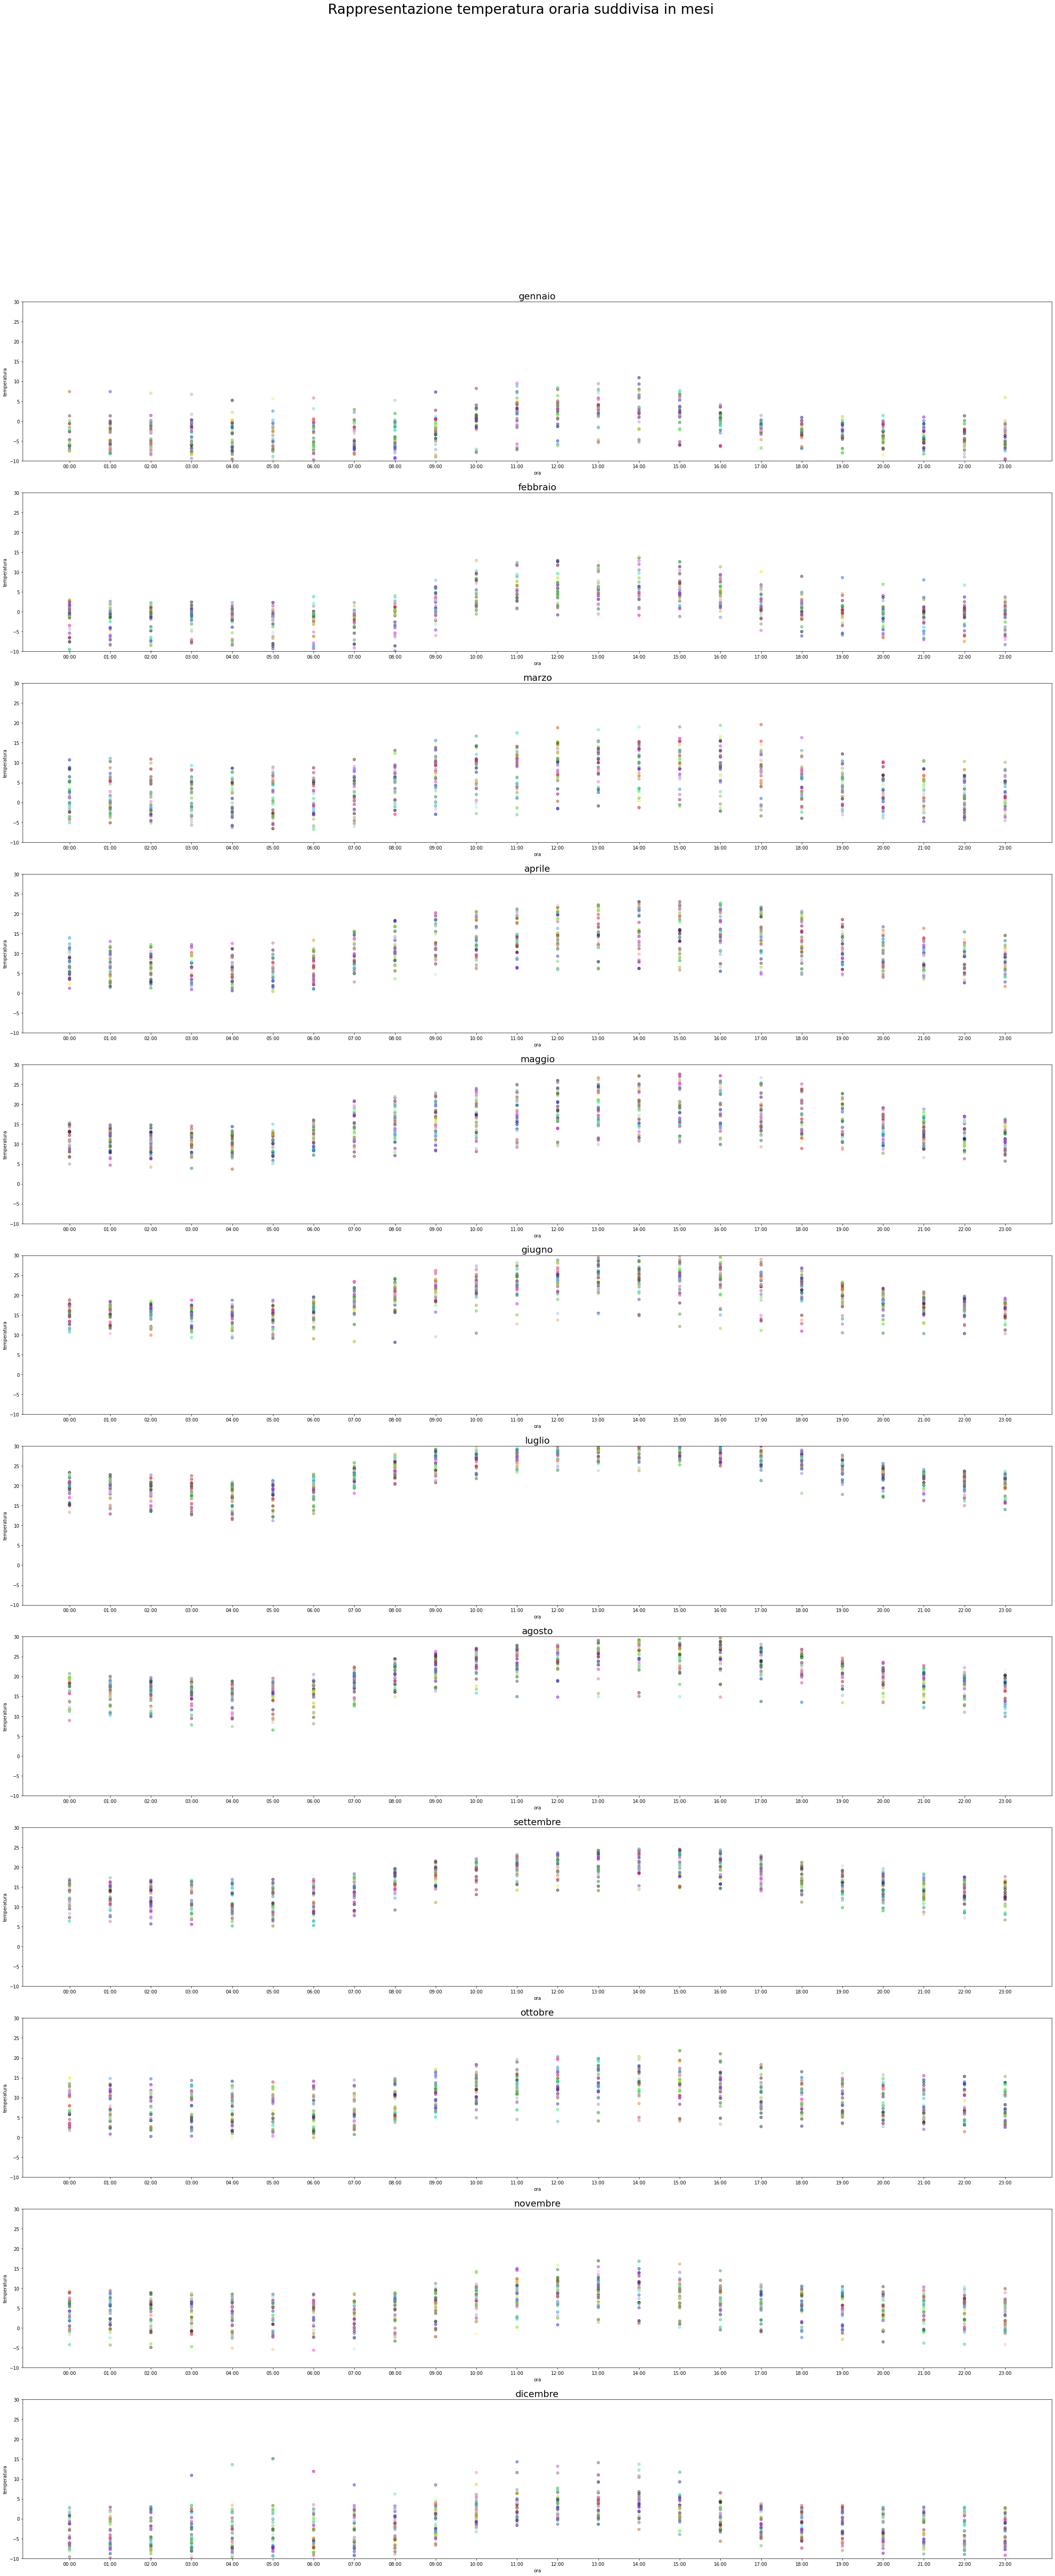

In [10]:
mese = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
mesi = ["gennaio", "febbraio", "marzo", "aprile", "maggio", "giugno", "luglio", "agosto", "settembre", "ottobre", "novembre", "dicembre"]
fig, axs = plt.subplots(nrows=12, ncols=1, figsize = (40, 90))
for i in range(0,12):
    axs[i].scatter(dizionario['ORA'][dizionario["MESE"] == mese[i]], dizionario["TERMA"][dizionario["MESE"] == mese[i]], 
                   alpha = 0.5, c = np.random.uniform(0., 1., (len(dizionario['ORA'][dizionario["MESE"] == mese[i]]), 3)))
    axs[i].set_title(mesi[i], fontsize = 20)
    axs[i].set_xlabel("ora")
    axs[i].set_ylabel("temperatura")
    
    #asse delle y uguale in ogni grafico
    axs[i].set_ylim(-10, 30)
fig.suptitle("Rappresentazione temperatura oraria suddivisa in mesi", fontsize = 30)
plt.savefig("Variazione temperatura di ogni mese.pdf")
plt.show()

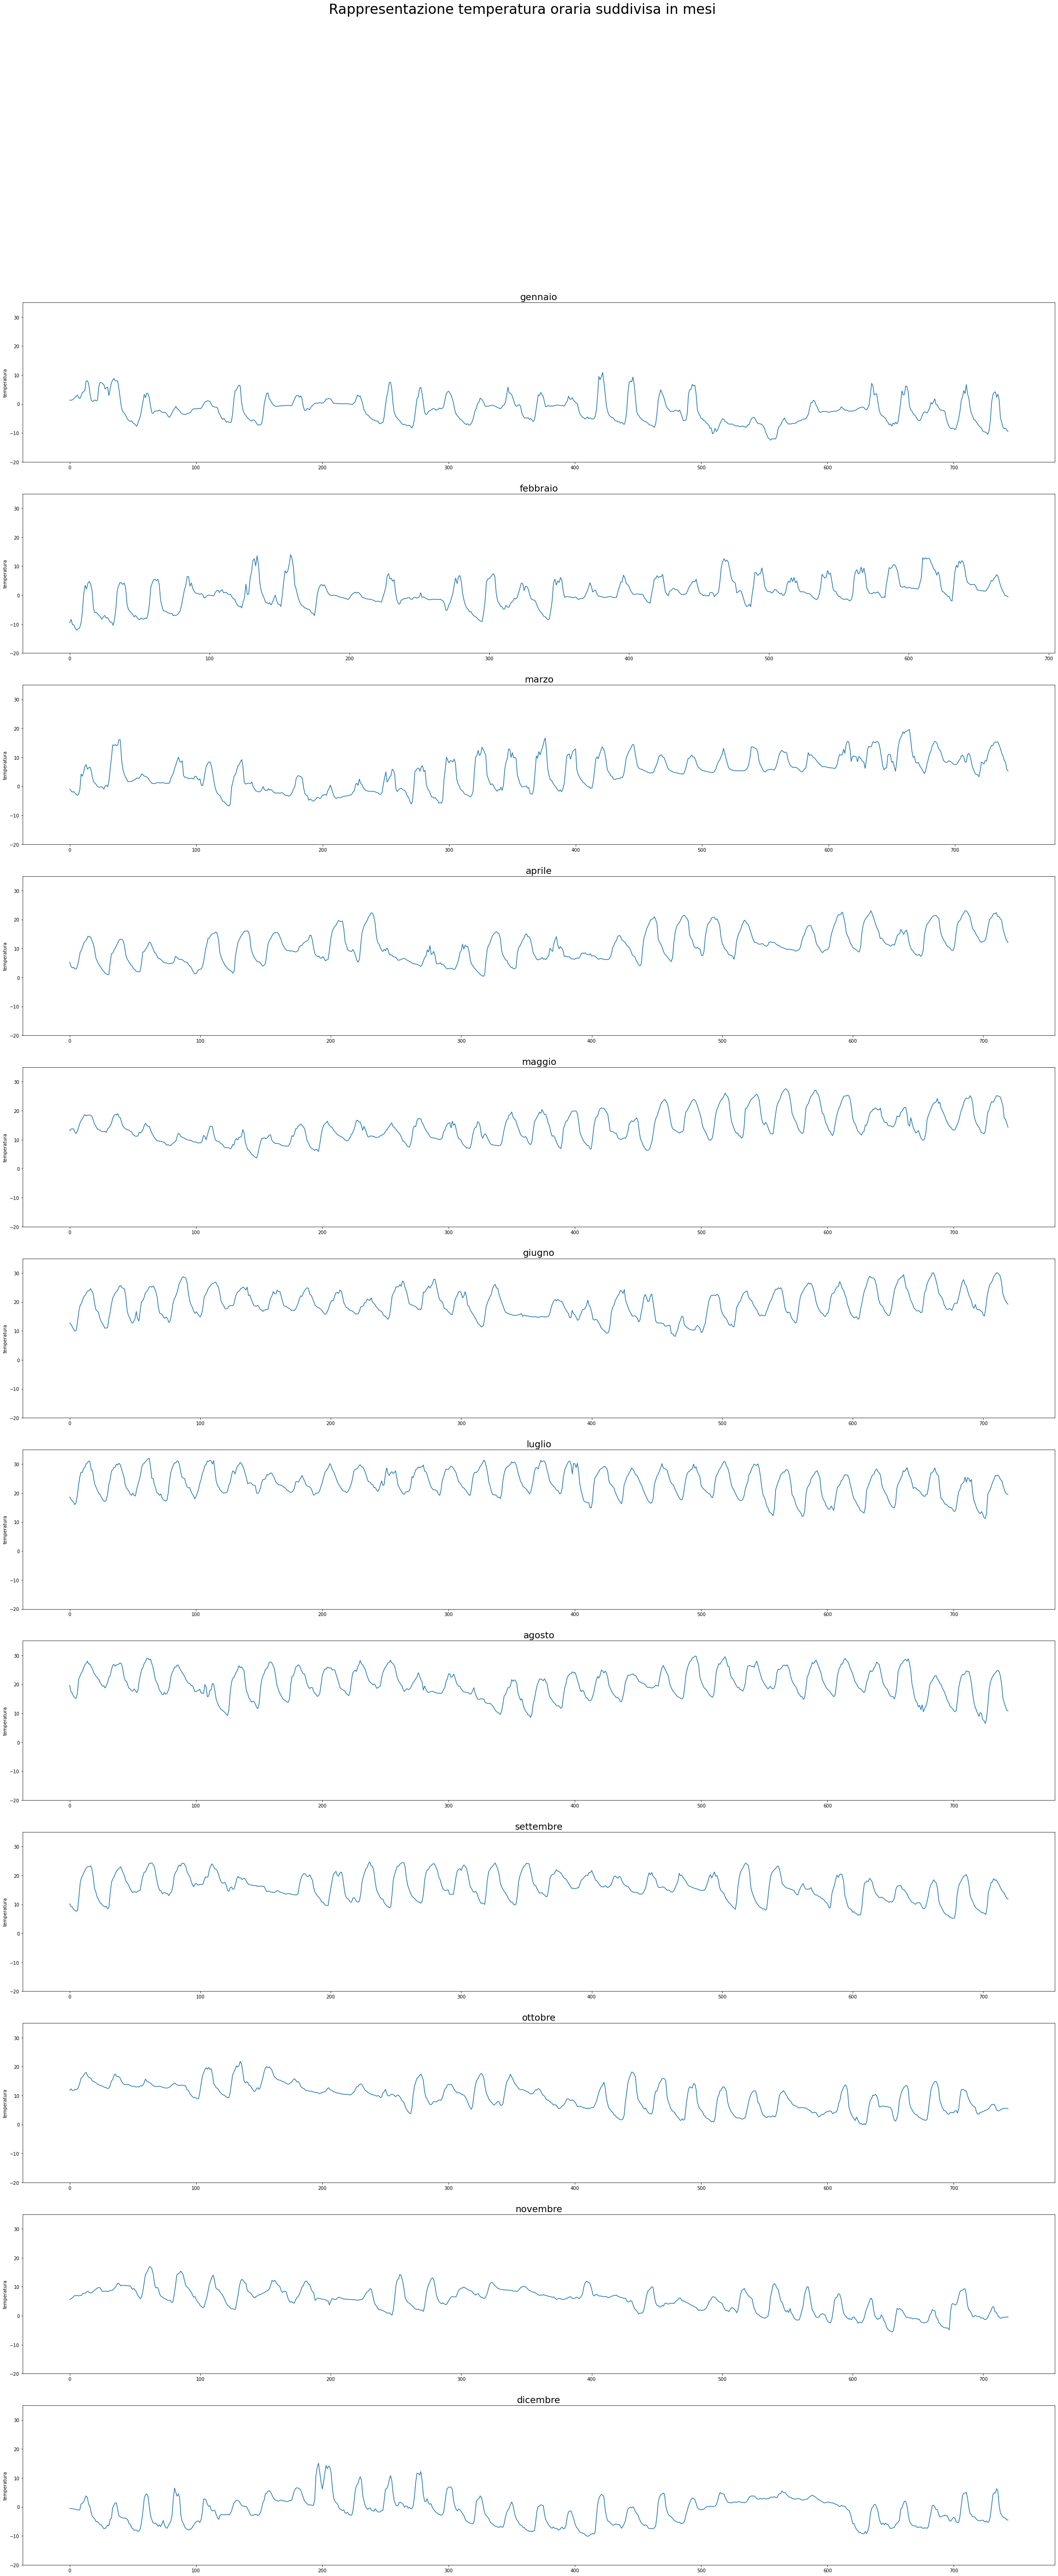

In [11]:
mese = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
mesi = ["gennaio", "febbraio", "marzo", "aprile", "maggio", "giugno", "luglio", "agosto", "settembre", "ottobre", "novembre", "dicembre"]
fig, axs = plt.subplots(nrows=12, ncols=1, figsize = (40, 90))
for i in range(0,12):
    axs[i].plot(dizionario["TERMA"][dizionario["MESE"] == mese[i]])
    axs[i].set_title(mesi[i], fontsize = 20)
    
    axs[i].set_ylabel("temperatura")
    #asse delle y uguale in ogni grafico
    axs[i].set_ylim(-20, 35)
fig.suptitle("Rappresentazione temperatura oraria suddivisa in mesi", fontsize = 30)
plt.savefig("Variazione temperatura di ogni mese.pdf")
plt.show()

In [12]:
def estrai_temperature(mese):
    return dizionario["TERMA"][dizionario['MESE'] == mese]

In [13]:
#estrai_temperature("03")

In [14]:
#giorno più caldo dell'anno
indici_giorni_32 = np.max(dizionario['TERMA']) == dizionario['TERMA']     #uso come indice di array date

In [15]:
dizionario['DATA'][indici_giorni_32]    #trovo il giorno con la temperatura massima

array(['03-07-2010'], dtype='<U10')

In [16]:
#temperatura minima del mese di luglio
np.min(estrai_temperature("07"))

11.2

In [17]:
def estrai_temperature_date(mese):
    return dizionario["TERMA"][dizionario['MESE'] == mese], dizionario["DATA"][dizionario['MESE'] == mese]

In [18]:
#giorno di luglio in cui c'è stata quella temperatura
temperatureLuglio, dateLuglio = (estrai_temperature_date("07"))
print(np.min(temperatureLuglio))

dateLuglio[temperatureLuglio == 11.2]


11.2


array(['31-07-2010'], dtype='<U10')

In [19]:
#temperatura media di agosto
np.mean(estrai_temperature("08"))

20.149193548387096

In [20]:
#mese in cui c'è la temperatura media più bassa
medie = []
for i in mese:
    medie.append(np.mean(estrai_temperature(i)))
    
medie = np.array(medie)
np.min(medie)

dizionario['MESE'][np.argmin(medie)]

'01'

In [21]:
# trovare tutti i valori dei massimi --> uso il roll    es 5 pag 107

In [23]:
temperatureLuglio = estrai_temperature("07")
temperatureLuglio = np.array(temperatureLuglio)
temperatureLuglio[np.logical_and(np.roll(temperatureLuglio, -1) < temperatureLuglio, np.roll(temperatureLuglio, 1) > temperatureLuglio)]


array([18.6, 17.9, 17.3, 16.9, 30.8, 28. , 27.8, 25.1, 22.8, 21.9, 20.8,
       20. , 19.5, 18.6, 17.8, 17.3, 29.8, 28.4, 26.9, 25.5, 22.8, 21.7,
       21.2, 20.5, 19.6, 19.2, 29. , 25.1, 25. , 23.1, 21.7, 20.1, 19.9,
       18.6, 17.7, 17.5, 31. , 29.6, 27.1, 25.4, 25.2, 25. , 23.3, 22.1,
       20.7, 19.7, 19.1, 31.1, 27.7, 24.2, 22.7, 22.1, 21.1, 20.7, 20.2,
       27.4, 30.1, 29.4, 28.2, 26.6, 25. , 23.3, 22.8, 22.7, 22.5, 20. ,
       26.1, 25.2, 24.1, 23.4, 23. , 22.6, 22.2, 22. , 21.6, 21. , 20.8,
       20.4, 25. , 24.2, 23. , 22.4, 22.3, 22.1, 21.7, 20.7, 29.4, 28. ,
       27.4, 26.3, 25. , 23.9, 23. , 22.3, 21.6, 21. , 29.1, 29. , 28.2,
       27.2, 25.9, 24.4, 23.8, 23.7, 23. , 22.9, 21.1, 26.8, 25.3, 22.7,
       21.8, 21.1, 20.4, 19.7, 27.6, 27.4, 26.4, 24.8, 23.5, 22.2, 21.6,
       20.9, 20.6, 19.6, 29. , 28.4, 27.7, 26.9, 25.2, 24. , 23.5, 22.8,
       22. , 21.8, 21.3, 20.7, 20.1, 19.4, 30.6, 28.9, 26.6, 23.6, 22.3,
       20.4, 19.5, 19.1, 30.3, 29. , 27. , 25.6, 24